In [2]:
import numpy as np
import pandas as pd
#import pandas.io.data as web
import pandas_datareader.data as web
import matplotlib as plt
import matplotlib.pylab as py


DPI: 72.0
Default size in Inches [ 6.  4.]
Which should result in a 432 x 288 Image


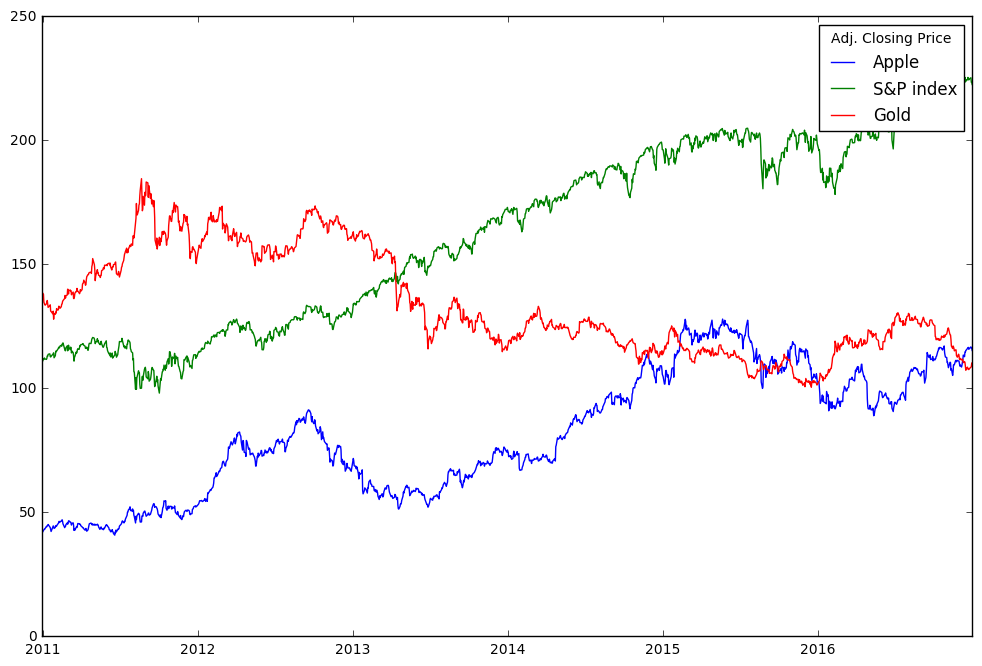

In [3]:
 %matplotlib inline
aapl = web.DataReader("AAPL", start='2010-12-31', end='2016-12-31',data_source='yahoo')['Adj Close']
spy =  web.DataReader("SPY", start='2010-12-31', end='2016-12-31',data_source='yahoo')['Adj Close']
gold =  web.DataReader("GLD", start='2010-12-31', end='2016-12-31',data_source='yahoo')['Adj Close']

#aapl.plot(title='AAPL Adj. Closing Price', label='Apple')
#spy.plot(label='S&P Index')
plt.pyplot.plot(aapl,label='Apple' )
plt.pyplot.plot(spy, label="S&P index")
plt.pyplot.plot(gold, label="Gold")
plt.pyplot.legend( loc='upper left', numpoints = 1 )
plt.pyplot.legend( title='Adj. Closing Price' )
F = py.gcf()
DPI = F.get_dpi()
print "DPI:", DPI
DefaultSize = F.get_size_inches()
print "Default size in Inches", DefaultSize
print "Which should result in a %i x %i Image"%(DPI*DefaultSize[0], DPI*DefaultSize[1])
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*2) )

In [53]:
ak=aapl.kurt()
aas=aapl.skew()
spk=spy.kurt()
spys=spy.skew()
print "Apple kurtosis: ", ak
print "Apple skew: ", aas
print "S&P kurtosis: ", spk
print "S&P skew: ", spys

Apple kurtosis:  -1.24183300052
Apple skew:  0.0786380982953
S&P kurtosis:  -1.4820431224
S&P skew:  -0.126471720422


In [4]:
def daily_return(prices):
    return prices['Adj Close'] / prices['Adj Close'].shift(1) - 1
#fuction calculate daily returns in a dataframe 

In [17]:
daily_appl=aapl.pct_change(1)# daily returns Timeseries pandas
daily_appl.fillna(value=0, axis=0, inplace=True) # fill NaN with 0

0.000807366853722
0.0164426880715
Apple kurtosis:  4.6540036326
Apple skew:  -0.176235312582


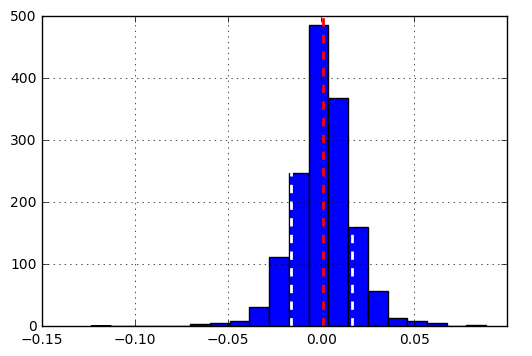

In [57]:

P=daily_appl.hist(bins=20)
mean_appl=daily_appl.mean()
std_appl=daily_appl.std()
print(mean_appl)
print(std_appl)
ak=daily_appl.kurt()
aas=daily_appl.skew()
print "Apple kurtosis: ", ak
print "Apple skew: ", aas
P.axvline(mean_appl, color="r",linestyle="dashed",linewidth=2)
P.axvline(std_appl, color="w",linestyle="dashed",linewidth=2)
P.axvline((-std_appl), color="w",linestyle="dashed",linewidth=2)

S&P kurtosis:  4.4104133088
S&P skew:  -0.436505131391


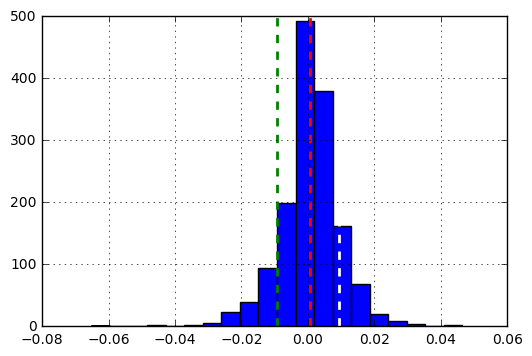

In [56]:

daily_return = spy.pct_change(1) # 1 for ONE DAY lookback
monthly_return = spy.pct_change(21) # 21 for ONE MONTH lookback
annual_return = spy.pct_change(252) # 252 for ONE YEAR lookback

daily_return.fillna(value=0, axis=0, inplace=True) # fill NaN with 0
P2=daily_return.hist(bins=20)
mean_spy=daily_return.mean()
std_spy=daily_return.std()

spk=daily_return.kurt()
spys=daily_return.skew()

print "S&P kurtosis: ", spk
print "S&P skew: ", spys
P2.axvline(mean_spy, color="r",linestyle="dashed",linewidth=2)
P2.axvline(std_spy, color="w",linestyle="dashed",linewidth=2)
P2.axvline(-std_spy, color="g",linestyle="dashed",linewidth=2)

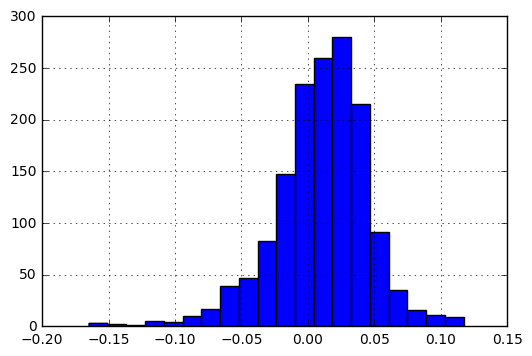

In [26]:
monthly_return.fillna(value=0, axis=0, inplace=True)
monthly_return.hist(bins=20)


Gold kurtosis:  5.00568056692
Gold skew:  -0.488322480143


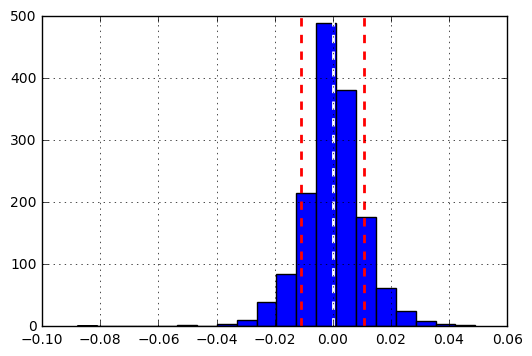

In [58]:
daily_return_g = gold.pct_change(1) # 1 for ONE DAY lookback
daily_return_g.fillna(value=0, axis=0, inplace=True)

P3=daily_return_g.hist(bins=20)
mean_gold=daily_return_g.mean()
std_gold=daily_return_g.std()
gk=daily_return_g.kurt()
gos=daily_return_g.skew()
print "Gold kurtosis: ", gk
print "Gold skew: ", gos
P3.axvline(mean_gold, color="w",linestyle="dashed",linewidth=2)
P3.axvline(std_gold, color="r",linestyle="dashed",linewidth=2)
P3.axvline(-std_gold, color="r",linestyle="dashed",linewidth=2)

Apple Beta 0.918816064567
Apple Alpha 0.000341245778475
Correlation 0.527370974273


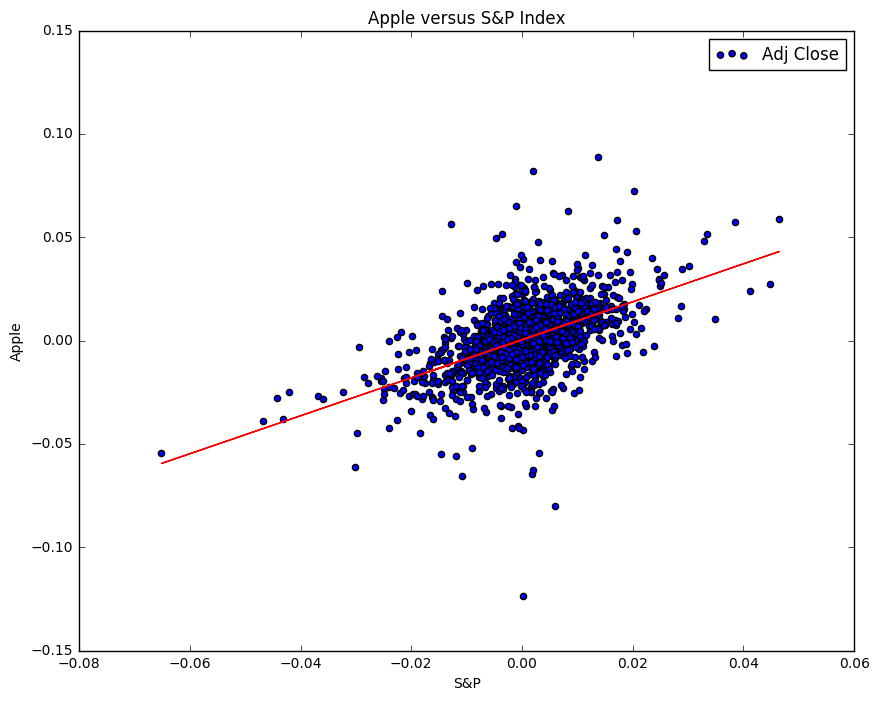

In [45]:
import matplotlib.pyplot as plt2
import numpy as np

plt2.figure(figsize=(10,8))
plt2.scatter(x=daily_return,y=daily_appl)
plt2.xlabel("S&P")
plt2.ylabel("Apple")
plt2.title('Apple versus S&P Index')
plt2.legend(loc='upper right')
beta_apple,alpha_apple=np.polyfit(daily_return, daily_appl,1)
print "Apple Beta", beta_apple
print "Apple Alpha", alpha_apple
print "Correlation", daily_return.corr(daily_appl,method='pearson')
plt2.plot(daily_return, beta_apple * daily_return + alpha_apple, '-', color='red')
#plt2.scatter(y=daily_returna, label="Apple")

Apple Beta -0.0274684900206
Apple Alpha -8.23912243094e-05
Correlation -0.0237973055964


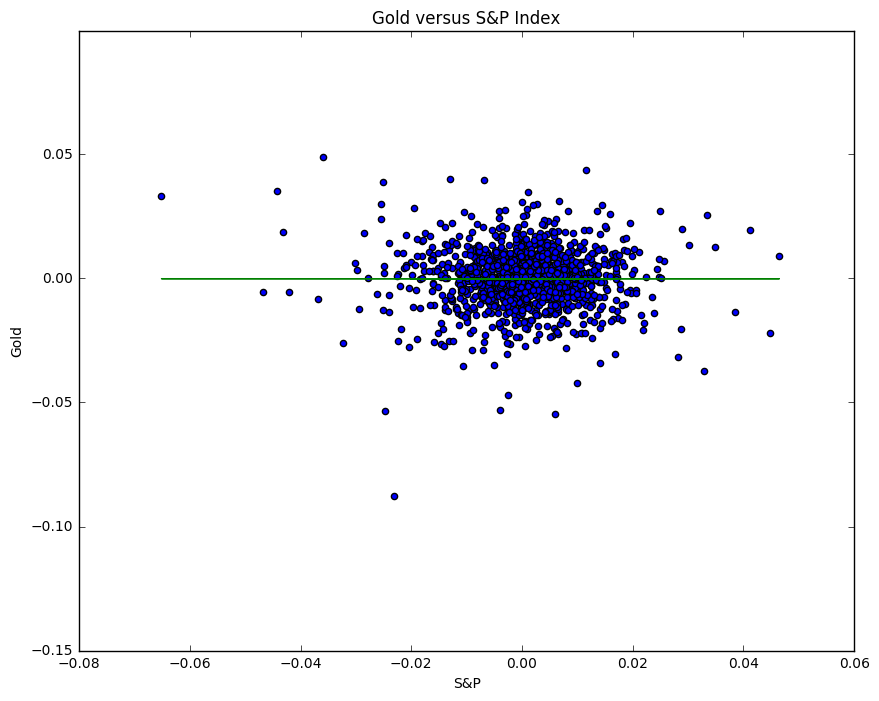

In [47]:
plt2.figure(figsize=(10,8))
plt2.scatter(x=daily_return,y=daily_return_g)
plt2.xlabel("S&P")
plt2.ylabel("Gold")
plt2.title('Gold versus S&P Index')
#plt2.legend(loc='upper right')
beta_gold,alpha_gold=np.polyfit(daily_return, daily_return_g,1)
print "Apple Beta", beta_gold
print "Apple Alpha", alpha_gold
print "Correlation", daily_return.corr(daily_return_g,method='pearson')
plt2.plot(daily_return, alpha_gold * daily_return + alpha_gold, '-', color='green')
#plt2.scatter(y=daily_returna, label="Apple")